In [ ]:
# TASK-4: Build an AI model that can classify SMS messages as spam or
# legitimate. Use techniques like TF-IDF or word embeddings with
# classifiers like Naive Bayes, Logistic Regression, or Support Vector
# Machines to identify spam messages

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None    
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from scipy import stats
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge

In [3]:
spam = pd.read_csv('spam1.csv')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
spam.drop(columns = drop, inplace = True)

In [7]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
columns_names = {"v1":"Category", "v2":"Message"}
spam.rename(columns = columns_names, inplace = True)

In [10]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
spam.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
spam.shape

(5572, 2)

In [14]:
spam.loc[spam["Category"] == "spam", "Category"] = 0
spam.loc[spam["Category"] == "ham", "Category"] = 1

In [16]:
X = spam["Message"]
Y = spam["Category"]
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
5       FreeMsg Hey there darling it's been 3 week's n...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
10      I'm gonna be home soon and i don't want to tal...
11      SIX chances to win CASH! From 100 to 20,000 po...
12      URGENT! You have won a 1 week FREE membership ...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
15      XXXMobileMovieClub: To use your credit, click ...
16                             Oh k...i'm watching here:)
17      Eh u r

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [18]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5572,)
(5572,)
(4457,)
(4457,)
(1115,)
(1115,)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [21]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [22]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [ ]:
# Logistic Regression

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [25]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_features, Y_train)

LogisticRegression()

In [26]:
pred_train = lr_classifier.predict(X_train_features)
pred_test  = lr_classifier.predict(X_test_features)
print('Training Accuracy : ', accuracy_score(Y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(Y_test, pred_test))

Training Accuracy :  0.9661207089970832
Testing  Accuracy :  0.9623318385650225


In [27]:
print('Training Set f1 score : ', f1_score(Y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(Y_test, pred_test))
print()
print('Test set precision : ', precision_score(Y_test, pred_test))
print('Test set recall    : ', recall_score(Y_test, pred_test))

Training Set f1 score :  0.9808205258478344
Testing  Set f1 score :  0.9785714285714285

Test set precision :  0.959
Test set recall    :  0.9989583333333333


In [28]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion_matrix',
                          cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


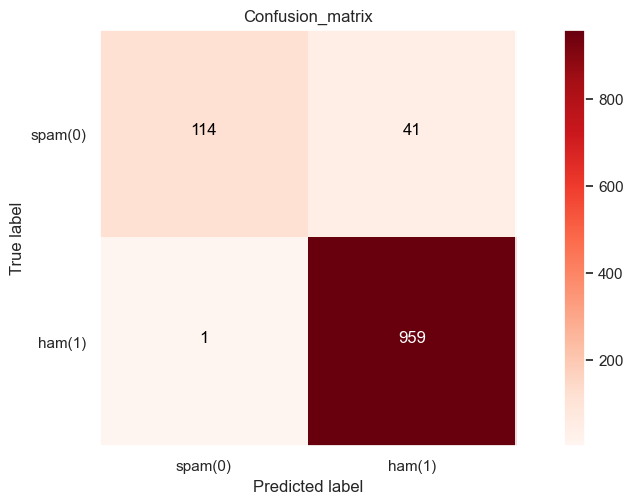

In [30]:
cm = confusion_matrix(Y_test, pred_test)
plt.figure(figsize = (10,5), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['spam(0)','ham(1)'])

In [ ]:
# Random Forest Classification

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 2)
rf_classifier.fit(X_train_features, Y_train)

RandomForestClassifier(max_depth=12, random_state=2)

In [32]:
pred_train = rf_classifier.predict(X_train_features)
pred_test  = rf_classifier.predict(X_test_features)
print('Training Set Accuracy : ', accuracy_score(Y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(Y_test, pred_test))

Training Set Accuracy :  0.9172088849001571
Testing Set Accuracy  :  0.9103139013452914


Confusion matrix, without normalization


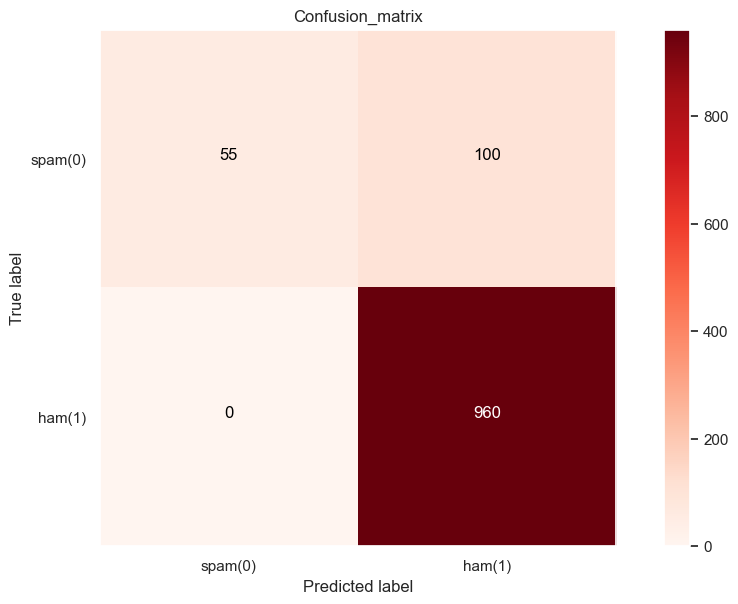

In [34]:
cm = confusion_matrix(Y_test, pred_test)
plt.figure(figsize = (10,6), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['spam(0)','ham(1)'])